In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
filename = '../data/pairs_AbacusSummit_base_c000_ph000_z0.100.hdf5'
data = {}
f = h5py.File(filename, 'r')
for k in f.keys():
    data[k] = f[k][...]
f.close()
print(data.keys())

dict_keys(['halo_A_id', 'halo_B_id', 'mass_A', 'mass_B', 'pos_A', 'pos_B', 'pos_G', 'vel_A', 'vel_B', 'vel_G', 'vmax_A', 'vmax_B', 'vmax_G'])


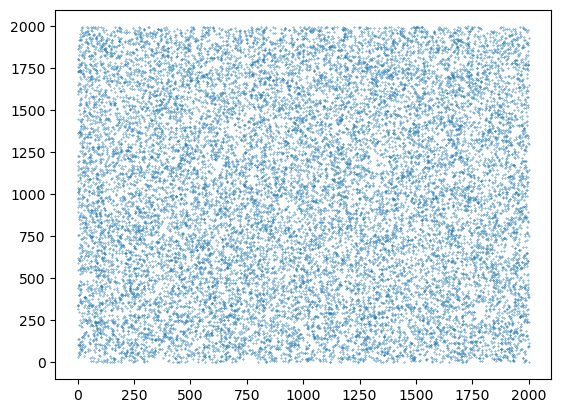

In [15]:
ii = data['pos_A'][:,2]<100
jj = (data['vmax_A']<250) & (data['vmax_B']<250.0)
plt.scatter(data['pos_A'][ii&jj,0], data['pos_A'][ii&jj,1], s=0.1)

In [5]:
v_a = data['vel_A'].copy()
v_b = data['vel_B'].copy()
v_cm = data['vel_A'].copy()
m_a = data['mass_A'].copy()
m_b = data['mass_B'].copy()

mass_tot = m_a + m_b
for i in range(3):
    v_cm[:,i] = v_a[:,i] * m_a/mass_tot
    v_cm[:,i] += v_b[:,i] * m_b/mass_tot
v_cm_norm = np.sqrt(np.sum(v_cm**2, axis=1))

/tmp/ipykernel_2020076/1003142223.py:9: RuntimeWarning: invalid value encountered in true_divide
  v_cm[:,i] = v_a[:,i] * m_a/mass_tot
/tmp/ipykernel_2020076/1003142223.py:10: RuntimeWarning: invalid value encountered in true_divide
  v_cm[:,i] += v_b[:,i] * m_b/mass_tot


In [14]:
np.count_nonzero((data['vmax_A']<250) & (data['vmax_B']<250.0))

384238